In [1]:
%cd D:/Documents/Escuela/SEEL/Research_Final

D:\Documents\Escuela\SEEL\Research_Final


In [2]:
import os
import numpy as np
import random

# For the plots
import matplotlib.pyplot as plt

In [3]:
from DatasetLoader_mine2 import DatasetLoader

parent = 'multipletimeseriesforecasting/preprocessed-data/'

path = os.path.join(parent, 'SanFranciscoTraffic/traffic_weekly_dataset.tsf')

dl = DatasetLoader('SanFranciscoTraffic', path)

matrix_1_original = dl.dataset_load_and_preprocess("original")
matrix_1_norm = dl.dataset_load_and_preprocess("normalized")
print(matrix_1_norm.shape)

---------------------------------------------------
Dataset name:  SanFranciscoTraffic
Dataset contains missing values?  False
--------------------------
---------------------------------------------------
Dataset name:  SanFranciscoTraffic
Dataset contains missing values?  False
--------------------------
(862, 104)


In [4]:
sample_len = (matrix_1_norm.shape[0]*matrix_1_norm.shape[1]*15)/(314*365)
print("Sample_len total", sample_len)

np.random.seed(4)
sets = np.random.choice(matrix_1_norm.shape[1]-40, int(sample_len), replace=False)
sets_training, sets_testing = sets[:int(len(sets)*.8)], sets[int(len(sets)*.8):]
print(sets_training, sets_testing)

Sample_len total 11.73300759096065
[48  4 31 34 26 59 10 60] [20  6 24]


### Model HD

In [5]:
from RegHD import Return_Model as Return_Model_HD, Train_Model as Train_HD, Test_Model as Test_HD

model_hd = Return_Model_HD()
model_hd, train_arr = Train_HD(model_hd, matrix_1_norm, sets_training)
model_hd, dif_hd = Test_HD(model_hd, matrix_1_norm, sets_testing)

 10%|█         | 1/10 [00:12<01:49, 12.22s/it]

Training mean squared error of 0.024


 20%|██        | 2/10 [00:22<01:30, 11.26s/it]

Training mean squared error of 0.017


 30%|███       | 3/10 [00:33<01:16, 10.94s/it]

Training mean squared error of 0.015


 40%|████      | 4/10 [00:44<01:05, 10.86s/it]

Training mean squared error of 0.013


 50%|█████     | 5/10 [00:54<00:54, 10.81s/it]

Training mean squared error of 0.012


 60%|██████    | 6/10 [01:05<00:43, 10.82s/it]

Training mean squared error of 0.011


 70%|███████   | 7/10 [01:17<00:33, 11.24s/it]

Training mean squared error of 0.010


 80%|████████  | 8/10 [01:29<00:22, 11.45s/it]

Training mean squared error of 0.009


 90%|█████████ | 9/10 [01:39<00:11, 11.10s/it]

Training mean squared error of 0.008


100%|██████████| 10/10 [01:51<00:00, 11.11s/it]


Training mean squared error of 0.008


100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

Testing mean squared error of testing 0.027


### Model DNN

In [6]:
from DNN import Return_Model as Return_Model_DNN, Train_Model as Train_DNN, Test_Model as Test_DNN

model_dnn = Return_Model_DNN()
model_dnn, train_arr = Train_DNN(model_dnn, matrix_1_norm, sets_training, retraining=True, dataset=4)
model_dnn, dif_dnn = Test_DNN(model_dnn, matrix_1_norm, sets_testing)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 40)]      0           []                               
                                                                                                  
 permute (Permute)              (None, 40, 1)        0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 40, 128)      1152        ['permute[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 40, 128)     512         ['conv1d[0][0]']                 
 alization)                                                                                   

  0%|          | 0/3 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 1/3 [01:08<02:16, 68.11s/it]

1/1 [==============================] - 0s 21ms/step


 67%|██████▋   | 2/3 [01:51<00:53, 53.79s/it]

1/1 [==============================] - 0s 20ms/step


100%|██████████| 3/3 [02:35<00:00, 51.95s/it]

Testing mean squared error of 0.023


### Model VAE

In [9]:
from VAE import Return_Model as Return_Model_VAE, Train_Model as Train_VAE, Test_Model as Test_VAE

vae, enc, dec, es = Return_Model_VAE()
vae, enc, dec, es = Train_VAE(vae, es, matrix_1_norm, sets_training, retraining=False, dataset = "4_5")
model_vae, dif_vae = Test_VAE(vae, matrix_1_norm, sets_testing)

d:\Aplicaciones\Anaconda\envs\tensorflow_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


862
104
862
104
(6896, 41, 1) (6896, 41, 1)
(6896, 41, 1) (6896, 41, 1)
Epoch 1/10
216/216 [==============================] - 6s 12ms/step - loss: 24.3150
Epoch 2/10
216/216 [==============================] - 2s 11ms/step - loss: 21.1523
Epoch 3/10
216/216 [==============================] - 2s 11ms/step - loss: 20.9359
Epoch 4/10
216/216 [==============================] - 2s 11ms/step - loss: 20.8169
Epoch 5/10
216/216 [==============================] - 2s 11ms/step - loss: 20.7840
Epoch 6/10
216/216 [==============================] - 2s 11ms/step - loss: 20.7139
Epoch 7/10
216/216 [==============================] - 2s 11ms/step - loss: 20.6091
Epoch 8/10
216/216 [==============================] - 2s 11ms/step - loss: 20.4070
Epoch 9/10
216/216 [==============================] - 2s 11ms/step - loss: 18.4048
Epoch 10/10
216/216 [==============================] - 2s 11ms/step - loss: 17.5481
862
104
862
104
(2586, 41, 1) (2586, 41, 1)
(2586, 41, 1) (2586, 41, 1)
81/81 [==================

[0.1136498, 0.11147525907377402, 0.12499570838231736]
[0.10107127, 0.1077826874147149, 0.10551044778697037]


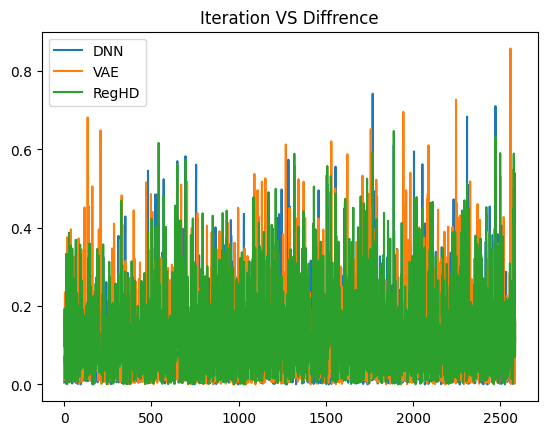

In [10]:
y = list(range(0,len(dif_dnn)))
dnn = [num[0][0] for num in dif_dnn]
vae = [num[0] for num in dif_vae]
reghd = [num.item() for num in dif_hd]

mean = [np.mean(dnn)] + [np.mean(vae)] + [np.mean(reghd)]
std = [np.std(dnn)] + [np.std(vae)] + [np.std(reghd)]
print(mean)
print(std)

#for i in range(len(vae)):
 #   if vae[i] > 0.7:
  #      vae[i] = 0.7


plt.title("Iteration VS Diffrence")
plt.plot(y, dnn, "-")
plt.plot(y, vae, "-")
plt.plot(y, reghd, "-")
plt.legend(["DNN", 'VAE', "RegHD"])
#plt.xlim(0,200)
plt.show()